In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
##### Vectorized forward euler
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points in time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 15/09/2019
def f_euler(F, ts, y0, p = 0):
    ys = [y0]
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(tnext, ys[-1], p)*h
        ys.append(ynext)
        t = tnext
    return np.array(ys)

In [52]:
##### Vectorized Runge Kutta 4th Order
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points in time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 15/09/2019
def rk_4(F, ts, y0, p = 0):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = F(t, ys[-1], p)
        k2 = F(t + h/2, ys[-1] + k1/2, p)
        k3 = F(t + h/2, ys[-1] + k2/2, p)
        k4 = F(t + h, ys[-1] + k3)
        ynext = ys[-1] + h*(k1/6+k2/3+k3/3+k4/6)
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

In [53]:
##### Vectorized Runge Kutta 2/3 Order
### Input:  F -> Differential equation;
###         y0 -> list or scalar for initial condition;
###         ts -> list of points in time to evaluate the equation;
###         p -> list or scalar for parameters for F, default is set to 0 if F has no extra parameters;
### Output: ys -> numpy array with all solutions for each step t, ys is a Matrix
##### Gil Miranda - last revision 15/09/2019
def rk_23(F, ts, y0, p = 0):
    ys = [y0]
    ys_til = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = F(t, ys[-1], p)
        k2 = F(t + h/2, ys[-1] + k1/2, p)
        k3 = F(t + 3*h/4, ys[-1] + 3*h*k2/4, p)
        k4 = F(t + h, ys[-1] + h/9 * (2*k1 + 3*k2 + 4*k3))
        ynext = ys[-1] + h/9 * (2*k1+3*k2+4*k3)
        ynext_til = ys[-1] + h/24 * (7*k1+6*k2+8*k3+3*k4)
        ys.append(ynext)
        ys_til.append(ynext_til)
        t = tnext
    return np.array(ys[:-1]),np.array(ys_til[:-1])

In [54]:
def dif_eq1(t, u, p = 0):
    return -5*u

In [55]:
ts = np.arange(-2,2,0.1)
ys_e = f_euler(dif_eq1, ts, 1)
ys_rk4 = rk_4(dif_eq1, ts, 1)
ys_rk23 = rk_23(dif_eq1, ts, 1)

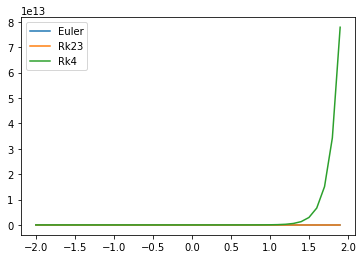

In [56]:
for (m,n) in zip([ys_e, ys_rk23[1], ys_rk4],['Euler', 'Rk23', 'Rk4']):
    plt.plot(ts, m, label = n)
plt.legend()
plt.show()

In [42]:
ts[25]

0.5000000000000022

In [46]:
ys_e[25], ys_rk4[25], ys_rk23[1][25]

(2.980232238769465e-08, 3.7637209499833537e-06, 0.0026877676182289513)